In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
## Handling Null Values

In [9]:
df.isnull().mean()


hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

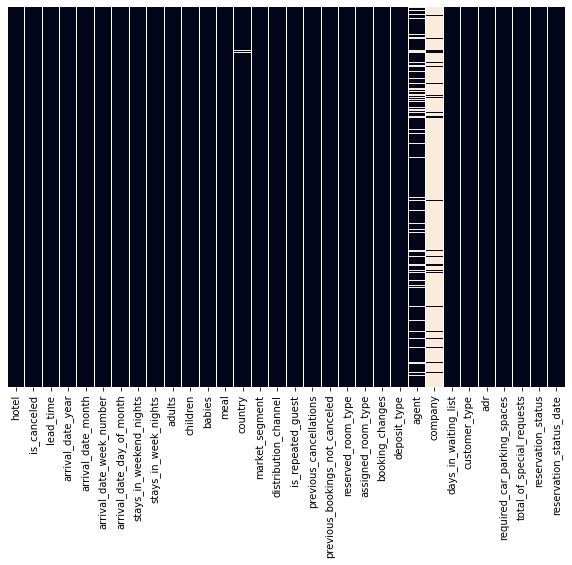

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)


In [ ]:
df.hist(bins=20, figsize=ize=(8,5))

In [11]:
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)


In [12]:
df['country'].replace(np.nan, 'UNKNOWN', inplace=True)
df["meal"].replace("Undefined", "SC", inplace=True)


In [13]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

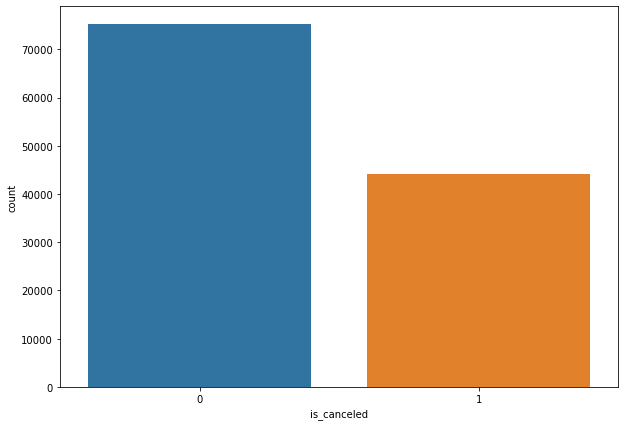

In [14]:
plt.figure(figsize=(10,7))
sns.countplot('is_canceled', data=df)


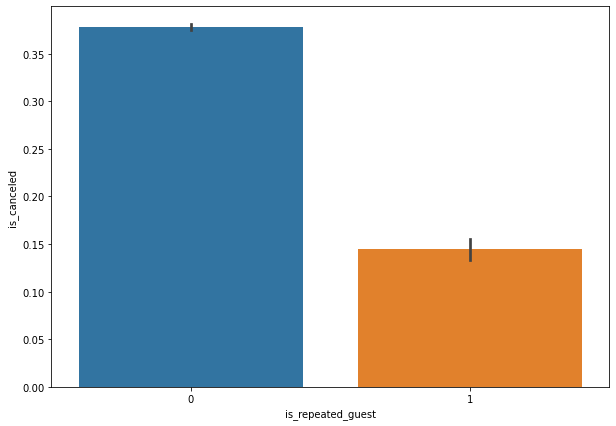

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=df, estimator=np.mean)


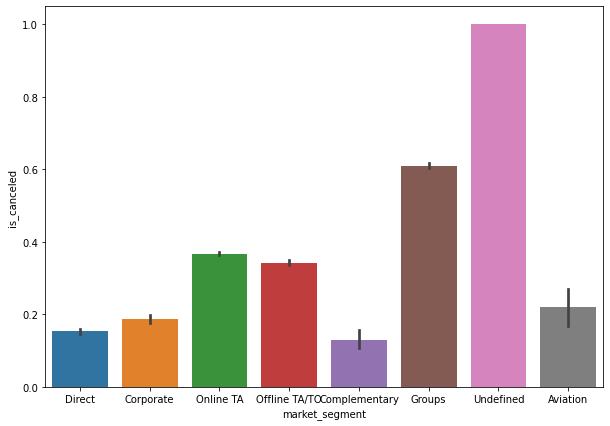

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="market_segment", y="is_canceled", data=df, estimator=np.mean)


In [17]:
df.groupby('market_segment')['is_canceled'].count()


market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: is_canceled, dtype: int64

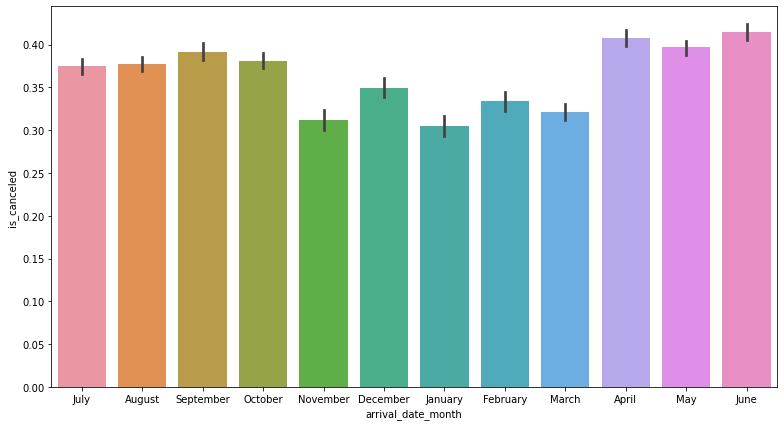

In [18]:
plt.figure(figsize=(13,7))
sns.barplot(x="arrival_date_month", y="is_canceled", data=df, estimator=np.mean)


In [19]:
df.groupby('arrival_date_month')['is_canceled'].mean()


arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: is_canceled, dtype: float64

In [38]:
df['arrival_qtr']=np.where(df['arrival_date_month'].isin(['January','February','March']),'Q1',
                   np.where(df['arrival_date_month'].isin(['April','May','June']),'Q2',
                            np.where(df['arrival_date_month'].isin(['July','August','September']),'Q3',
                                     np.where(df['arrival_date_month'].isin(['October','November','December']),'Q4',0))))


In [39]:
df['arrival_qtr'].value_counts()


Q3    37046
Q2    33819
Q4    24734
Q1    23791
Name: arrival_qtr, dtype: int64

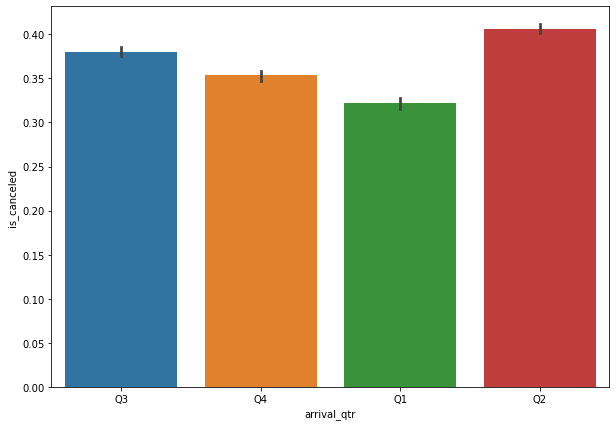

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x="arrival_qtr", y="is_canceled", data=df, estimator=np.mean)


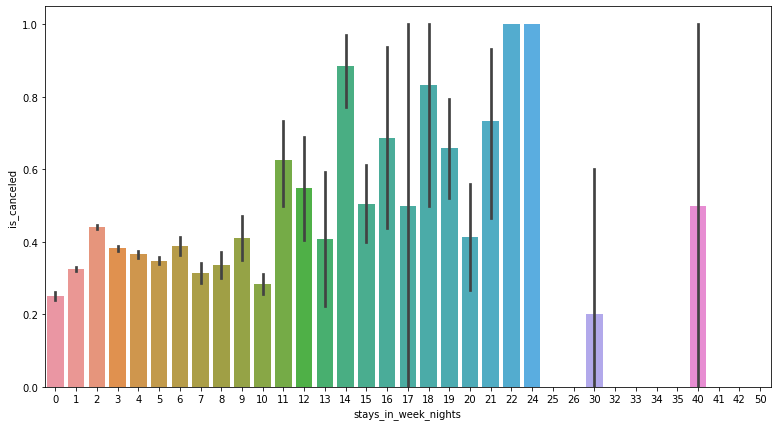

In [20]:
plt.figure(figsize=(13,7))
sns.barplot(x="stays_in_week_nights", y="is_canceled", data=df, estimator=np.mean)


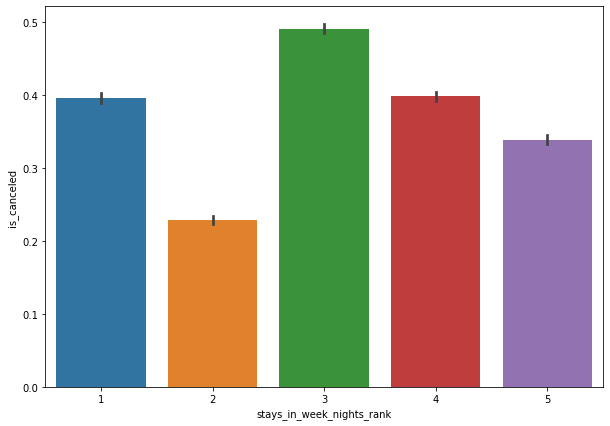

In [21]:
df['stays_in_week_nights_rank'] = pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
plt.figure(figsize=(10,7))
sns.barplot(x="stays_in_week_nights_rank", y="is_canceled", data=df, estimator=np.mean)


In [22]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()


stays_in_week_nights_rank
1    0
2    1
3    2
4    2
5    4
Name: stays_in_week_nights, dtype: int64

In [23]:
df['stay_in_week_night_grp'] = np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,
                                        np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['is_canceled'].mean()


stay_in_week_night_grp
1    0.312170
2    0.444510
3    0.338722
Name: is_canceled, dtype: float64

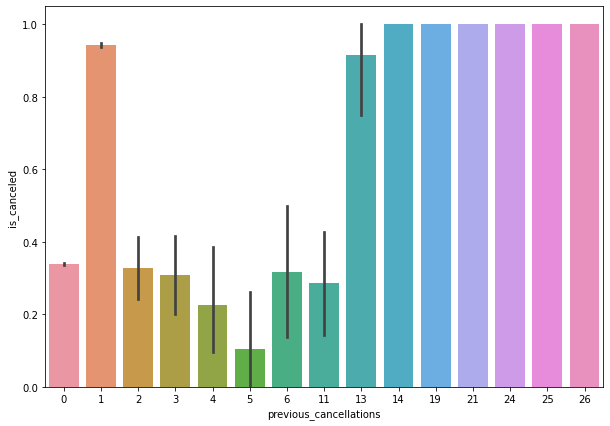

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(x="previous_cancellations", y="is_canceled", data=df, estimator=np.mean)


In [25]:
df['previous_cancellations'].value_counts()


0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [26]:
df['prev_cancel_ind'] = np.where(df['previous_cancellations'].isin(['0']),0,1)
df['prev_cancel_ind'].value_counts()


0    112906
1      6484
Name: prev_cancel_ind, dtype: int64

In [27]:
df.groupby('booking_changes')['is_canceled'].mean()


booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: is_canceled, dtype: float64

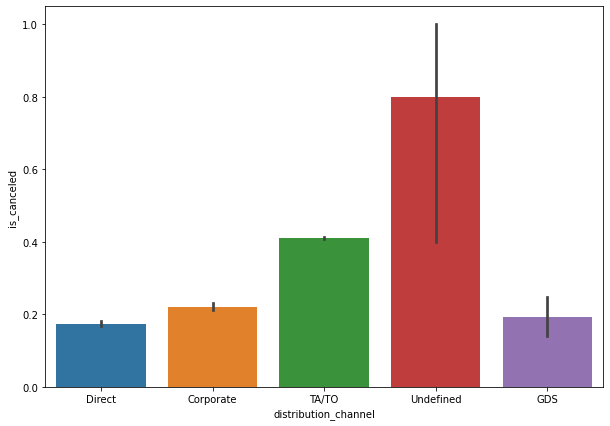

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x="distribution_channel", y="is_canceled", data=df, estimator=np.mean)


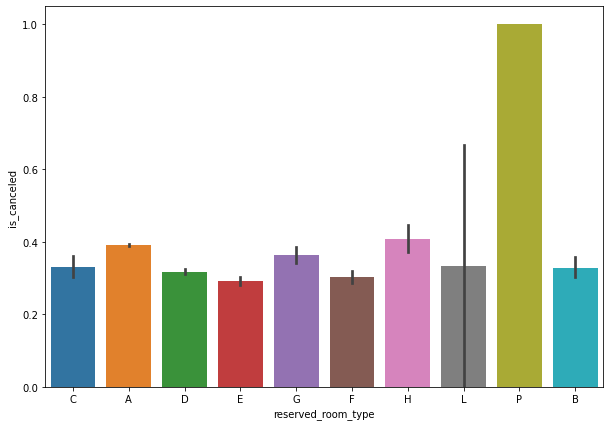

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x="reserved_room_type", y="is_canceled", data=df, estimator=np.mean)


In [30]:
df['reserved_room_type'].value_counts()


A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

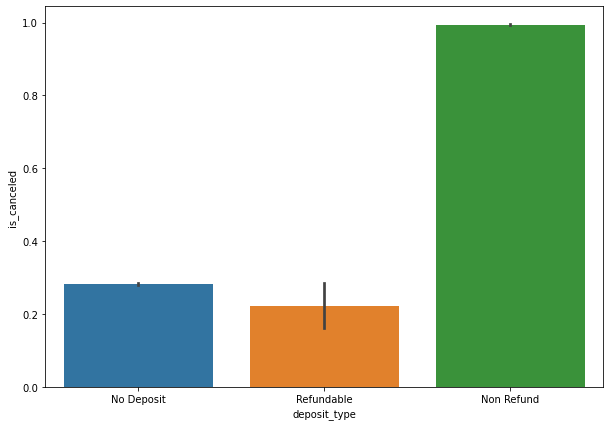

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x="deposit_type", y="is_canceled", data=df, estimator=np.mean)


In [32]:
df['deposit_type'].value_counts()


No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

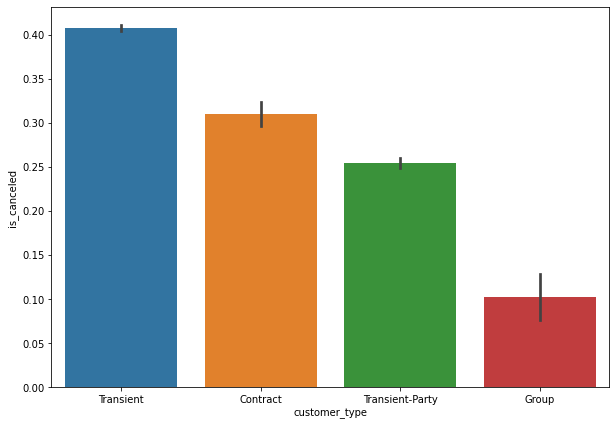

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x="customer_type", y="is_canceled", data=df, estimator=np.mean)


In [34]:
df['customer_type'].value_counts()


Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

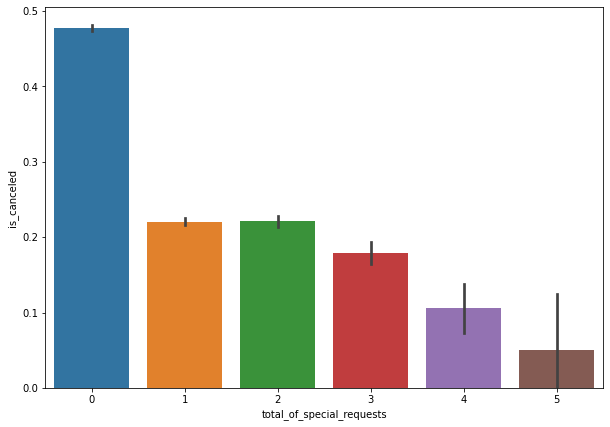

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x="total_of_special_requests", y="is_canceled", data=df, estimator=np.mean)


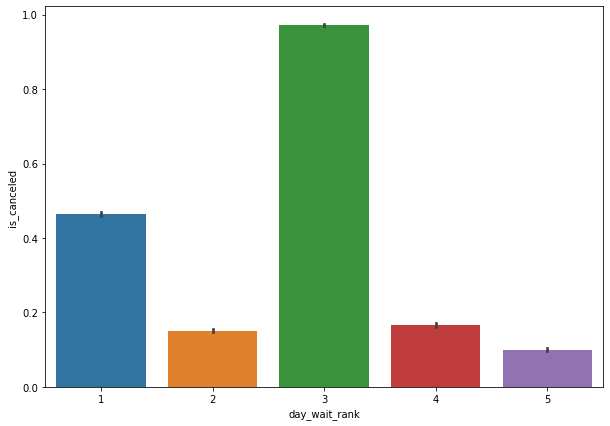

In [41]:
df['day_wait_rank'] = pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
plt.figure(figsize=(10,7))
sns.barplot(x="day_wait_rank", y="is_canceled", data=df, estimator=np.mean)


In [42]:
df['day_wait_ind'] = np.where(df['day_wait_rank'].isin(['3']),1,0)
df['day_wait_ind'].value_counts()


0    95512
1    23878
Name: day_wait_ind, dtype: int64

In [43]:
df[['reservation_status_year', 'reservation_status_month', 
    'reservation_status_day']] = df['reservation_status_date'].str.split('-', expand = True).astype(int)


In [44]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'stays_in_week_nights_rank', 'stay_in_week_night_grp',
       'prev_cancel_ind', 'arrival_qtr', 'day_wait_rank', 'day_wait_ind',
       'reservation_status_year', 'reservation_status_month',
       'reservation_status_day'],
      dtype='object')

In [45]:
df.drop(['company', 'day_wait_rank', 'stays_in_week_nights_rank', 'previous_cancellations', 'days_in_waiting_list',
         'stays_in_week_nights', 'country', 'reservation_status_date','arrival_date_month'], axis=1, inplace=True)


In [46]:
num_cols = df.select_dtypes(exclude='object').drop('is_canceled', 1).columns.tolist()
char_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Features = {}".format(num_cols))
print()
print("Categorical Features = {}".format(char_cols))


Numerical Features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stay_in_week_night_grp', 'prev_cancel_ind', 'day_wait_ind', 'reservation_status_year', 'reservation_status_month', 'reservation_status_day']

Categorical Features = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'arrival_qtr']


In [47]:
X_char_dum = pd.get_dummies(df[char_cols], drop_first = True)
X_all = pd.concat([df[num_cols], X_char_dum], axis=1, join='inner')


In [48]:
X = X_all
y = df['is_canceled']


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y, shuffle=True)
print('Shape of X_train = {} and X_test = {}'.format(X_train.shape, X_test.shape))


Shape of X_train = (89542, 66) and X_test = (29848, 66)


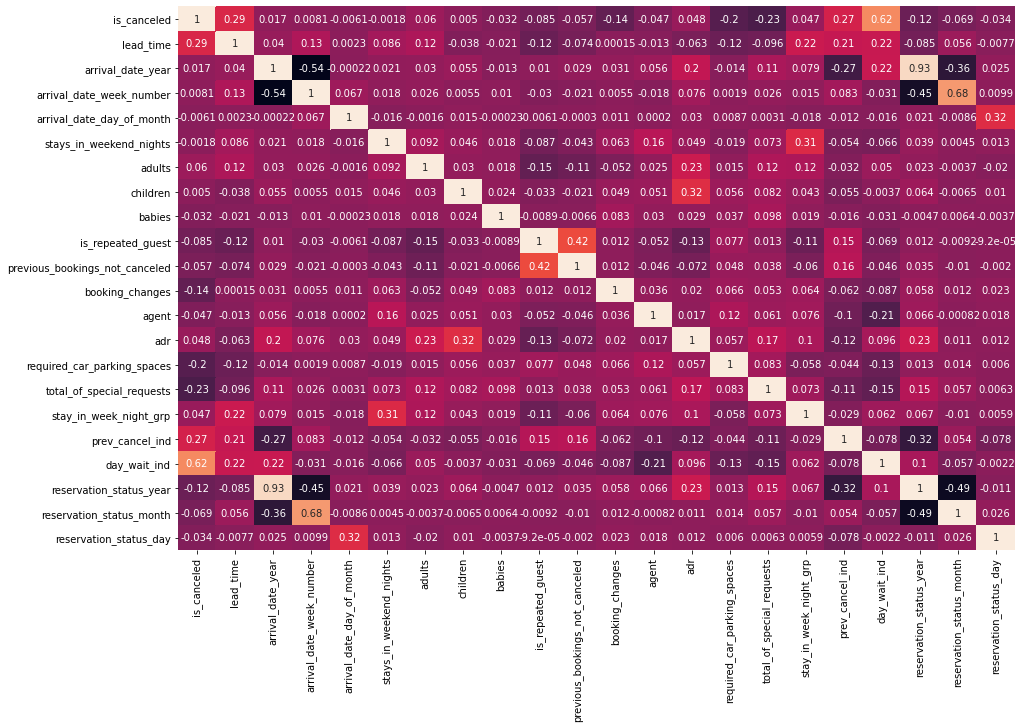

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cbar=False)

In [51]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print('Highly correlated features (Number of features {}) = {}'.format(len(set(corr_features)), corr_features))


Highly correlated features (Number of features 6) = {'assigned_room_type_H', 'assigned_room_type_P', 'reservation_status_year', 'assigned_room_type_G', 'distribution_channel_Direct', 'customer_type_Transient-Party'}


In [52]:
X_train.drop(['assigned_room_type_H', 'assigned_room_type_P', 'assigned_room_type_G', 'customer_type_Transient-Party',
              'distribution_channel_Direct', 'reservation_status_year'], 1, inplace=True)
X_test.drop(['assigned_room_type_H', 'assigned_room_type_P', 'assigned_room_type_G', 'customer_type_Transient-Party',
              'distribution_channel_Direct', 'reservation_status_year'], 1, inplace=True)


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf_list = [KNeighborsClassifier(), SVC()]

df_clf = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Accuracy'])

for clf in clf_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    clf_name = str(type(clf)).split('.')[-1][:-2]

    train = round(clf.score(X_train, y_train), 3)
    
    test = round(clf.score(X_test, y_test), 3)
    
    accuracy = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    cv = round(accuracy.mean()*100, 3)

    df_clf = df_clf.append({'Name': clf_name, 'Train Score': train, 'Test Score': test, 'Mean Accuracy': cv},
                  ignore_index=True)

df_clf


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   58.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


,Name,Train Score,Test Score,Mean Accuracy
0,KNeighborsClassifier,0.99,0.985,98.336
1,SVC,1.00,0.999,99.892


In [55]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Train Score = {}'.format(svm.score(X_train, y_train)*100))
print('Test Score = {}'.format(svm.score(X_test, y_test)*100))


Train Score = 99.9810144959907
Test Score = 99.91624229429108


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))
print()
print('Accuracy Score = {}'.format(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred))


[[18792     0]
 [   25 11031]]

Accuracy Score = 0.9991624229429108

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       1.00      1.00      1.00     11056

    accuracy                           1.00     29848
   macro avg       1.00      1.00      1.00     29848
weighted avg       1.00      1.00      1.00     29848



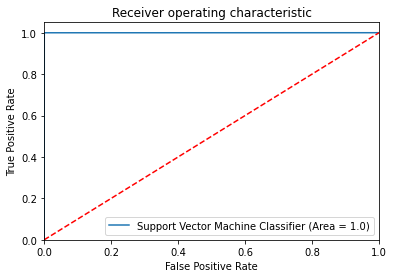

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Support Vector Machine Classifier (Area = {})'.format(round(roc_auc), 3))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
